# 20.8 Dimensionality and PCA

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preparing-the-data" data-toc-modified-id="Preparing-the-data-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Preparing the data</a></span><ul class="toc-item"><li><span><a href="#Dealing-with-outliers-and-missing-values" data-toc-modified-id="Dealing-with-outliers-and-missing-values-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Dealing with outliers and missing values</a></span></li></ul></li><li><span><a href="#Question-1" data-toc-modified-id="Question-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Question 1</a></span></li><li><span><a href="#Question-2" data-toc-modified-id="Question-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Question 2</a></span></li><li><span><a href="#Question-3" data-toc-modified-id="Question-3-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Question 3</a></span></li><li><span><a href="#Question-4" data-toc-modified-id="Question-4-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Question 4</a></span></li><li><span><a href="#Question-5" data-toc-modified-id="Question-5-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Question 5</a></span></li></ul></div>

**Assignment**

In this assignment, you'll continue working with the [U.S. Education Dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home) from Kaggle. The data gives detailed state level information on the several facets of the state of education on annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above. You should access the data from the Thinkful database. Below are the credentials you can use to connect to the database:

`postgres_user = 'dsbc_student' <br>
 postgres_pw = '7\*.8G9QH21'<br>
 postgres_host = '142.93.121.174'<br>
 postgres_port = '5432'<br>
 postgres_db = 'useducation'<br>`

Don't forget to apply the most suitable missing value filling techniques you applied in the previous checkpoints to the data. You should provide your answers to the following questions after you handled the missing values.

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

Say, we want to understand the relationship between the expenditures of the governments and the students' overall success in the math and reading.

## Preparing the data

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

In [4]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

data = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

### Dealing with outliers and missing values

In [6]:
data.isna().sum()/data.isna().count()

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

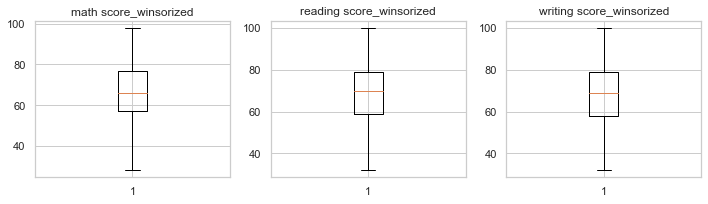

In [10]:
data2 = data.copy()
exam_scores = ['math score', 'reading score', 'writing score']

plt.figure(figsize = (10, 3))

for index, col in enumerate(exam_scores):
    data2[col + '_winsorized'] = winsorize(data2[col], limits = 0.01)
    
    plt.subplot(1, 3, index + 1)
    plt.boxplot(data2[col + '_winsorized'])
    plt.title(col + '_winsorized')
    
plt.tight_layout()
plt.show()

In [11]:
winsorized_exam_scores = [col + '_winsorized' for col in exam_scores]

data2.drop(columns = ['math score', 'reading score', 'writing score'], inplace=True)
data2.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score_winsorized',
       'reading score_winsorized', 'writing score_winsorized'],
      dtype='object')

Data is ready.

## Question 1

Create a new score variable from the weighted averages of all score variables in the datasets. **Notice that the number of students in the 4th grade isn't the same as the number of students in the 8th grade. So, you should appropriately weigh the scores!**.

## Question 2

What are the correlations between this newly created score variable and the expenditure types? Which 1 of the expenditure types is more correlated than the others?

## Question 3
Now, apply PCA to the 4 expenditure types. How much of the total variance is explained by the 1st component?

## Question 4
What is the correlation between the overall score variable and the 1st principal component? 

## Question 5
If you were to choose the best variables for your model, would you prefer using the 1st principal component instead of the expenditure variables? Why?